In [1]:
# importing packages and modules
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import minimize
from utils import *
from plotting_utils import *
from analysis_utils import *
import dglm_hmm1
from scipy.stats import multivariate_normal, norm
# import jax

# code from summer project working with PWM data
import sys, os
sys.path.append(os.path.abspath(os.path.join('..', '..', 'LC_PWM_GLM-HMM/code')))
import io_utils, analysis_utils, plotting_utils

sns.set_context("talk")

In [2]:
# list of animals that have good psychometrics
animalsIDs = ['W060','W068','W073','W074','W075','W080','W081','W082','W088','W089']

In [3]:
pni_path = '/Users/lencacuturela/Desktop/github/LC_PWM_GLM-HMM/data'
laptop_path = '/Users/lencacuturela/Desktop/Research/github/LC_PWM_GLM-HMM/data'

In [26]:
df = io_utils.load_and_wrangle(rat_id='W081', path=None, psychometric=True, cutoff=10, overwrite=False, stage_filter=3)
print(len(df.index.tolist()))
x, y = io_utils.prepare_design_matrices(rat_id='W081', path=None, psychometric=True, cutoff=10, stage_filter=3, overwrite=False)
sessInd = list(io_utils.session_start(rat_id='W081', path=None, psychometric=True, cutoff=10, stage_filter=3))
print(x.shape)
print(y.shape)
nfolds = 4
trainX, trainY, trainSessInd, testX, testY, testSessInd = split_data_per_session(x, y, sessInd, folds=nfolds, random_state=1)
print(trainX[0].shape)
print(testX[0].shape)
print(len(trainSessInd[0]))

104438
(104438, 6)
(104438,)
(78129, 6)
(26309, 6)
561


### Fitting dGLM-HMM1 for PWM data with K=1,2 and multiple sigmas value

In [5]:
randomOrder = np.array([6, 1, 9, 4, 5, 0, 7, 8, 3, 2])
print(randomOrder) # [6 1 9 4 5 0 7 8 3 2]

[6 1 9 4 5 0 7 8 3 2]


In [10]:
sigmaList = [0] + [10**x for x in list(np.arange(-3,1,0.5,dtype=float))] + [10**x for x in list(np.arange(1,5,1,dtype=float))] 
nfolds = 4

for randInd in randomOrder:
    animal = animalsIDs[randInd]
    print("Animal ", animal)
    for K in [1,2]:
        fit_eval_CV_multiple_sigmas_PWM(rat_id=animal, stage_filter=3, K=K, folds=nfolds, sigmaList = sigmaList, maxiter=300, path=laptop_path, save=True)

Animal  W081
Sigma Index 0
0
Sigma Index 1
0
100
200
Sigma Index 2
0
100
200
Sigma Index 3
0
100
200
Sigma Index 4
0
100
200
Sigma Index 5
0
Sigma Index 6
0
Sigma Index 7
0
Sigma Index 8
0
Sigma Index 9
0
Sigma Index 10
0
Sigma Index 11
0
Sigma Index 0
0


KeyboardInterrupt: 

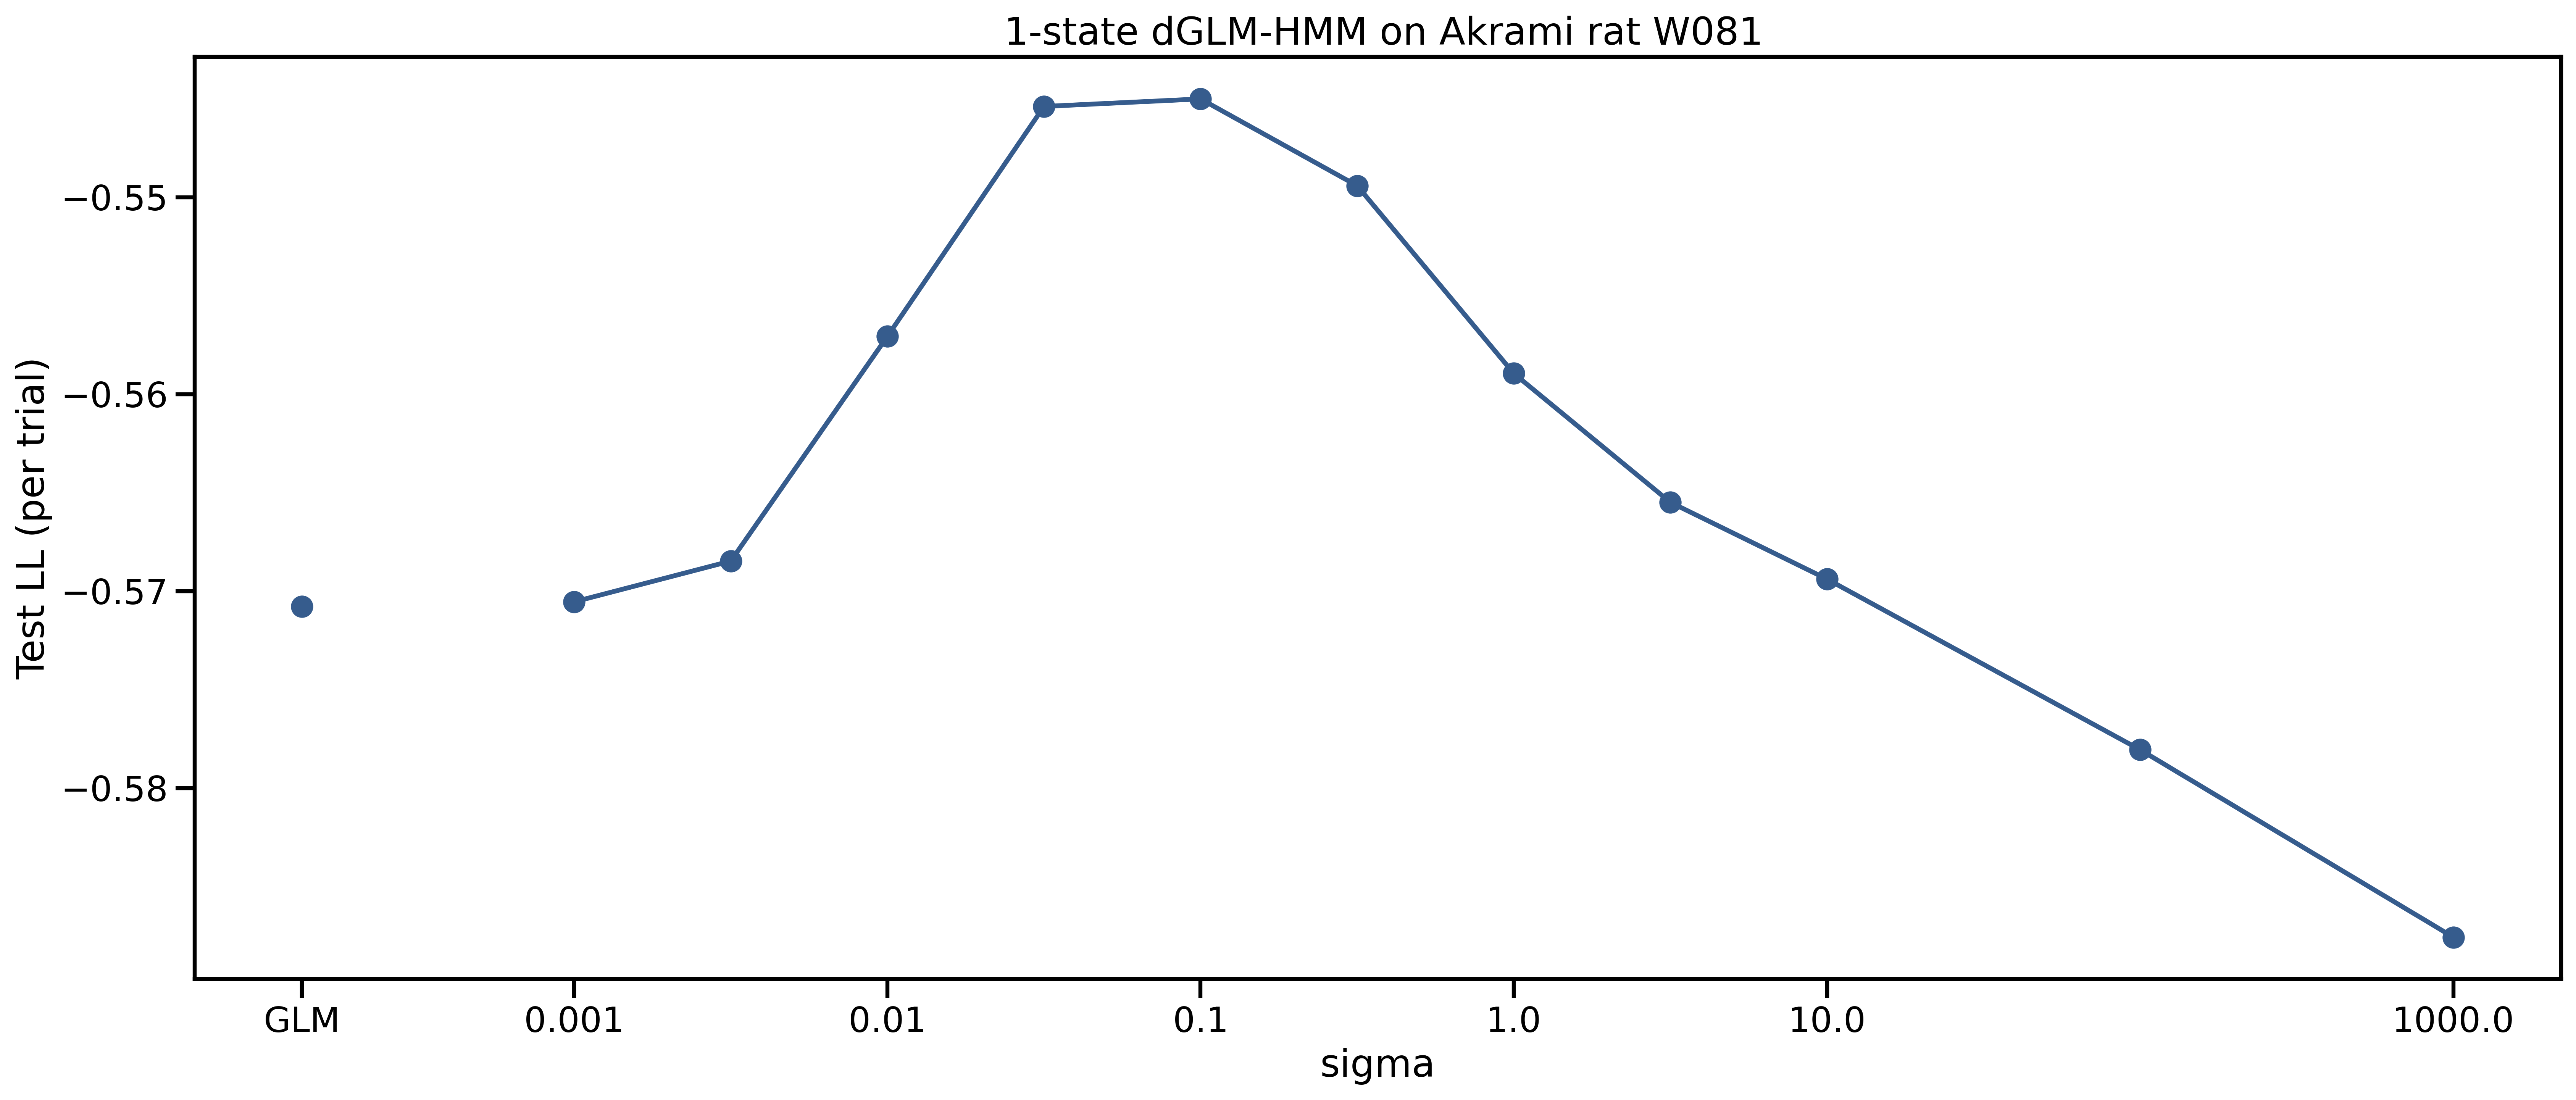

In [6]:
sigmaList = [0] + [10**x for x in list(np.arange(-3,1,0.5,dtype=float))] + [10**x for x in list(np.arange(1,4,1,dtype=float))] 
nfolds = 4
fig, axes = plt.subplots(1,figsize=(20,8), dpi=400)
sigma_CV_testLl_plot_PWM(rat_id='W081', stage_filter=3, K=1, folds=1, sigmaList=sigmaList, axes=axes, title=f' 1-state dGLM-HMM on Akrami rat W081', save_fig=True)